In [302]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib

import sys

sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Plotting") #\plots.py")
from plots import *
from post_processing_class import TensorTomographyReconstruction, SH_Reconstruction, EXPSIN_Reconstruction

%reload_ext autoreload
%autoreload 2

In [183]:
Dummy_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data Sets\Dummy_periodic_filter1_11cube_4off_0align.mat"
Dummy = SH_Reconstruction(Dummy_path, dataset=True)


In [303]:
symbolic_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\analysis\SASTT\Dummy_periodic_filter1_11cube_4off_0align\SH\results\result_Dummy_periodic_filter1_11cube_4off_0align_q17-40_all_again_symbolic.mat"
symbolic = SH_Reconstruction(symbolic_path, dataset=False)

In [304]:
AD_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data sets\analysis\SASTT\Dummy_periodic_filter1_11cube_4off_0align\SH\results\result_Dummy_periodic_filter1_11cube_4off_0align_q17-40_all_again_AD_python.mat"
AD = SH_Reconstruction(AD_path, dataset=False)

C:\Users\Bruker\AppData\Local\Temp\ipykernel_156144\2954001503.py:14: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im)


0.6980939443356609 0.07880060890616829
0.6899999999999998 1.1102230246251565e-16
[0.27057158]
0.6322975063246459 0.12530809997489145
[0.29139707]


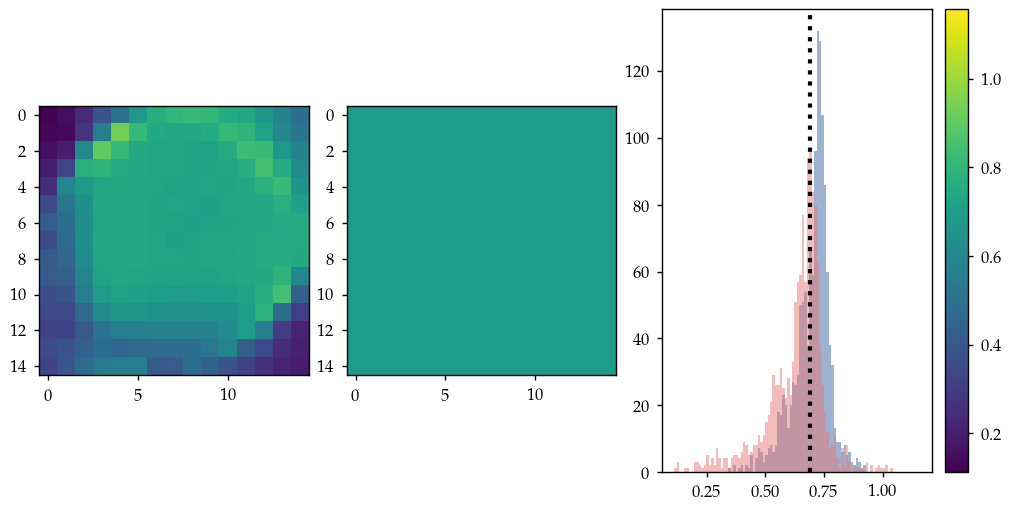

In [123]:
key = "a0"
slice1, slice2 = Dummy.slice
vmin = np.min(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2]) - 3* np.std(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2])
vmax = np.max(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2]) + 3* np.std(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2])
if key == "phi" or key == "theta":
    r = (0, np.pi)
else:
    r = (vmin, vmax)

center = np.mean(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2])
std = np.std(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2])
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
im = axs[0].imshow(symbolic[key][slice1+5, :, :], vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
axs[1].imshow(Dummy[key][slice1+5, :, :], vmin=vmin, vmax=vmax)
vals = axs[2].hist(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), density=False, bins=100, range= r, alpha = 0.5)
axs[2].hist(AD[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten(), density=False, bins=100, range= r, alpha = 0.5)
counts = vals[0]
xaxis = vals[1]
#axs[2].hist(Dummy[key][slice1:slice2, slice1:slice2, slice1:slice2].flatten()[:level], density= False, bins=100, range= r, alpha = 1)
axs[2].axvline(x=Dummy[key][0,0,0], color = "black", linestyle = ":")


print(np.mean(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2]), np.std(symbolic[key][slice1:slice2, slice1:slice2, slice1:slice2]))
print(np.mean(Dummy[key][:, :, :]), np.std(Dummy[key][:, :, :]))
print(symbolic.error_data[-1])

print(np.mean(AD[key][slice1:slice2, slice1:slice2, slice1:slice2]), np.std(AD[key][slice1:slice2, slice1:slice2, slice1:slice2]))
print(AD.error_data[-1])


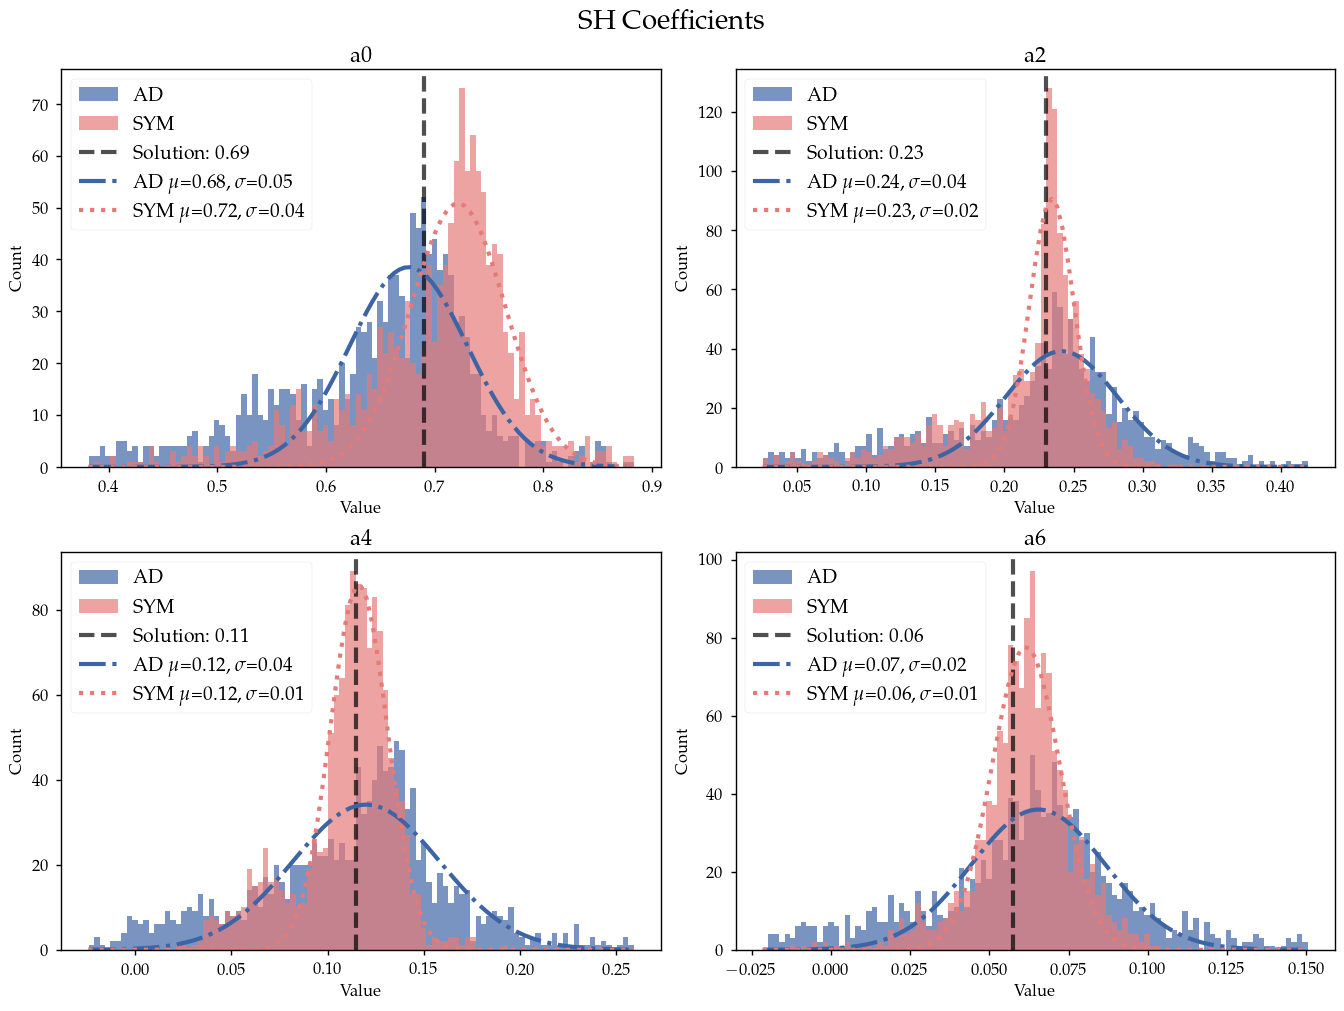

In [204]:
dummy_values = Dummy.params[:,0,0,0]
plot_SH_aligned_distribution(    AD,
    symbolic,
    dummy_values,
    Dummy.slice,
    "coeffs",
    title="SH ",
    bins=100,
    save=False,
    save_name="theis_res/SH_coeffs_aligned_distribution",
    std_c=2,
    DPI = 100)

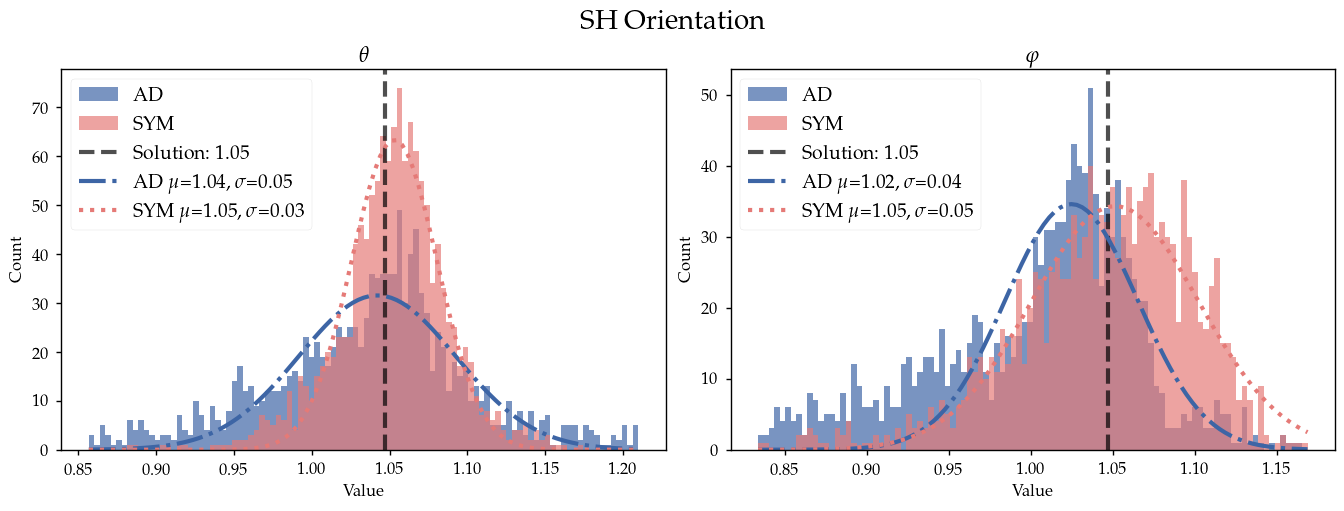

In [205]:
dummy_angles = Dummy.params[-2:,0,0,0]
plot_SH_aligned_distribution(    AD,
    symbolic,
    dummy_angles,
    Dummy.slice,
    "angles",
    title="SH ",
    bins=100,
    save=False,
    save_name="theis_res/SH_coeffs_aligned_distribution",
    std_c=2,
    DPI = 100,
    shareaxis = True)

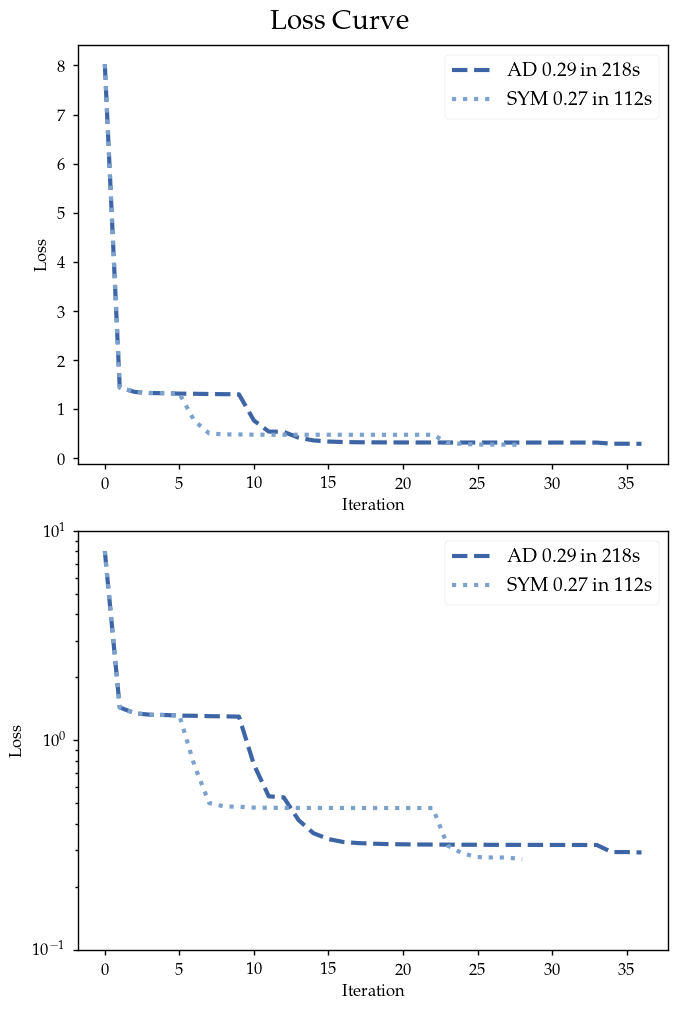

In [180]:
# Loss curves

loss_data = {}
loss_data["AD"] = [AD.loss_curve, AD.tot_time]
loss_data["SYM"] = [symbolic.loss_curve, symbolic.tot_time]

plot_loss_curves(loss_data, save=False, DPI=100, logcurve=True, yloglim = (1e-1,1e1))

# The curve fitting is actually just dependent on number of iterations. Do not waste more time for now. 

In [305]:
Dummy_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data Sets\Dummy_periodic_filter1_17cube_8off_0align.mat"
Dummy_1f17c8o = SH_Reconstruction(Dummy_path, dataset=True)
symbolic_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_17cube_8off_0align_q17-40_all_again_symbolic.mat"
symbolic_1f17c8o = SH_Reconstruction(symbolic_path, dataset=False)
AD_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_17cube_8off_0align_q17-40_all_again_AD_python.mat"
AD_1f17c8o = SH_Reconstruction(AD_path, dataset=False)


4 21
4913


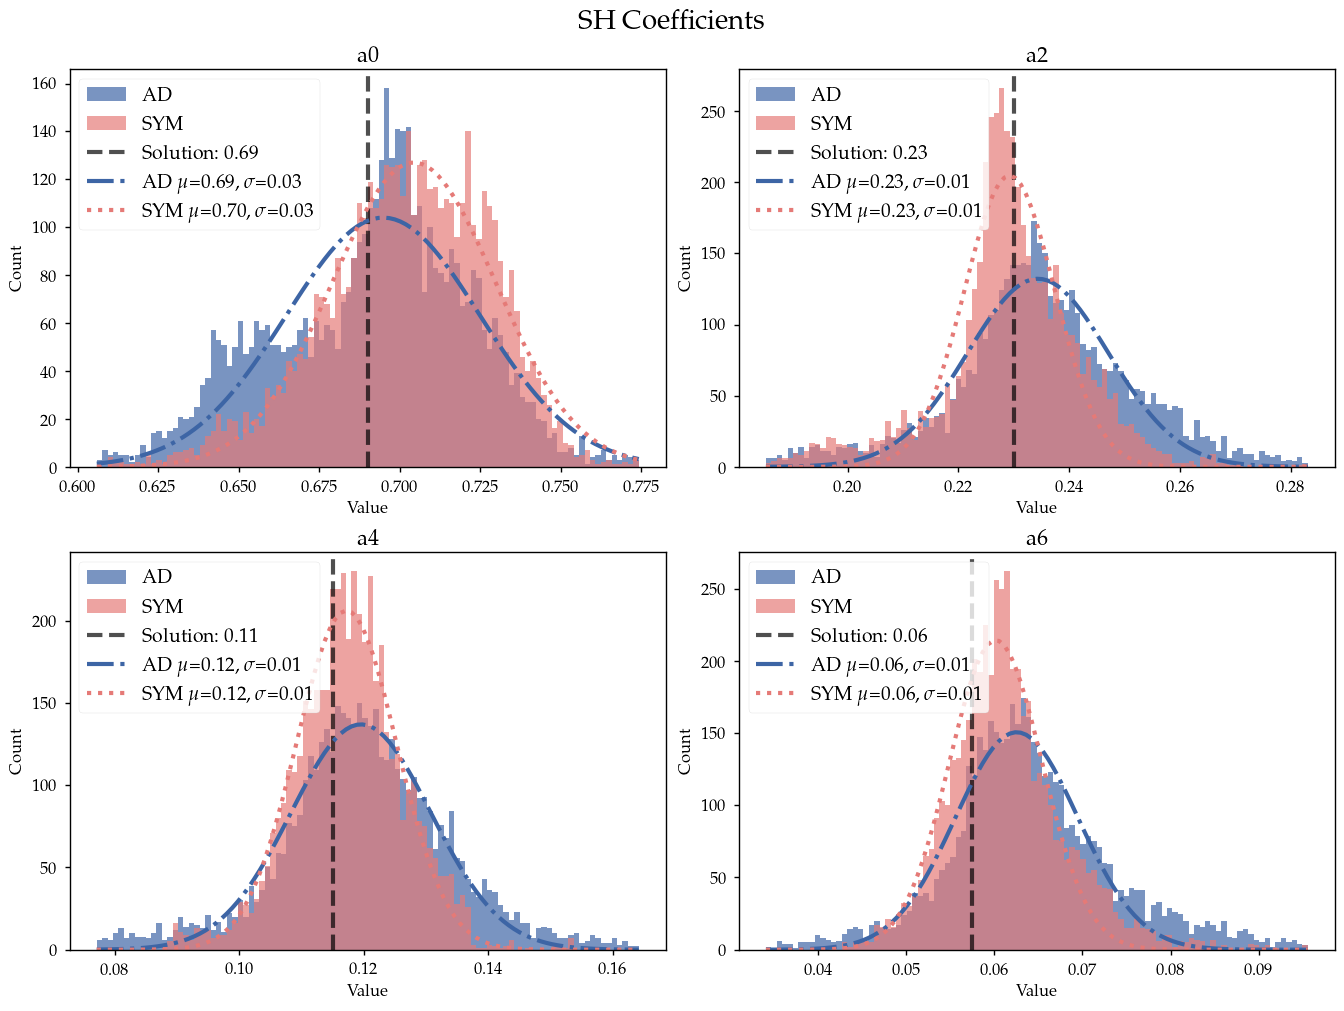

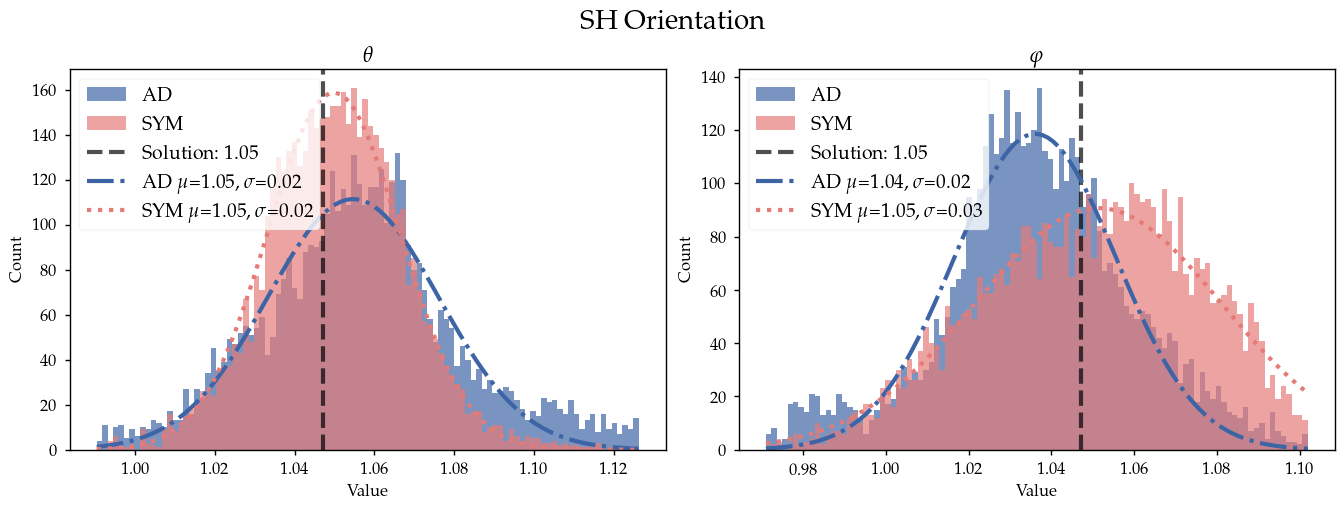

In [201]:
s1, s2 = Dummy_1f17c8o.slice
print(s1, s2)
len_test = len(AD_1f17c8o.a0[s1:s2, s1:s2, s1:s2].flatten())
print(len_test)
plot_SH_aligned_distribution(
    AD_1f17c8o,
    symbolic_1f17c8o,
    Dummy_1f17c8o.params[:,0,0,0],
    Dummy_1f17c8o.slice,
    "coeffs",
    title="SH ",
    bins=100,
    save=False,
    save_name="thesis_res/SH_coeffs_aligned_distribution",
    std_c=2,
    DPI = 100,
)
plot_SH_aligned_distribution(
    AD_1f17c8o,
    symbolic_1f17c8o,
    Dummy_1f17c8o.params[-2:,0,0,0],
    Dummy_1f17c8o.slice,
    "angles",
    title="SH ",
    bins=100,
    save=False,
    save_name="thesis_res/SH_coeffs_aligned_distribution",
    std_c=2,
    DPI = 100,
    shareaxis = True)

In [306]:
Dummy_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data Sets\Dummy_periodic_filter1_27cube_8off_0align.mat"
Dummy_1f27c8o = SH_Reconstruction(Dummy_path, dataset=True)
symbolic_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_27cube_8off_0align_q17-40_all_again_symbolic.mat"
symbolic_1f27c8o = SH_Reconstruction(symbolic_path, dataset=False)
AD_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter1_27cube_8off_0align_q17-40_all_again_AD_python.mat"
AD_1f27c8o = SH_Reconstruction(AD_path, dataset=False)

4 31
19683


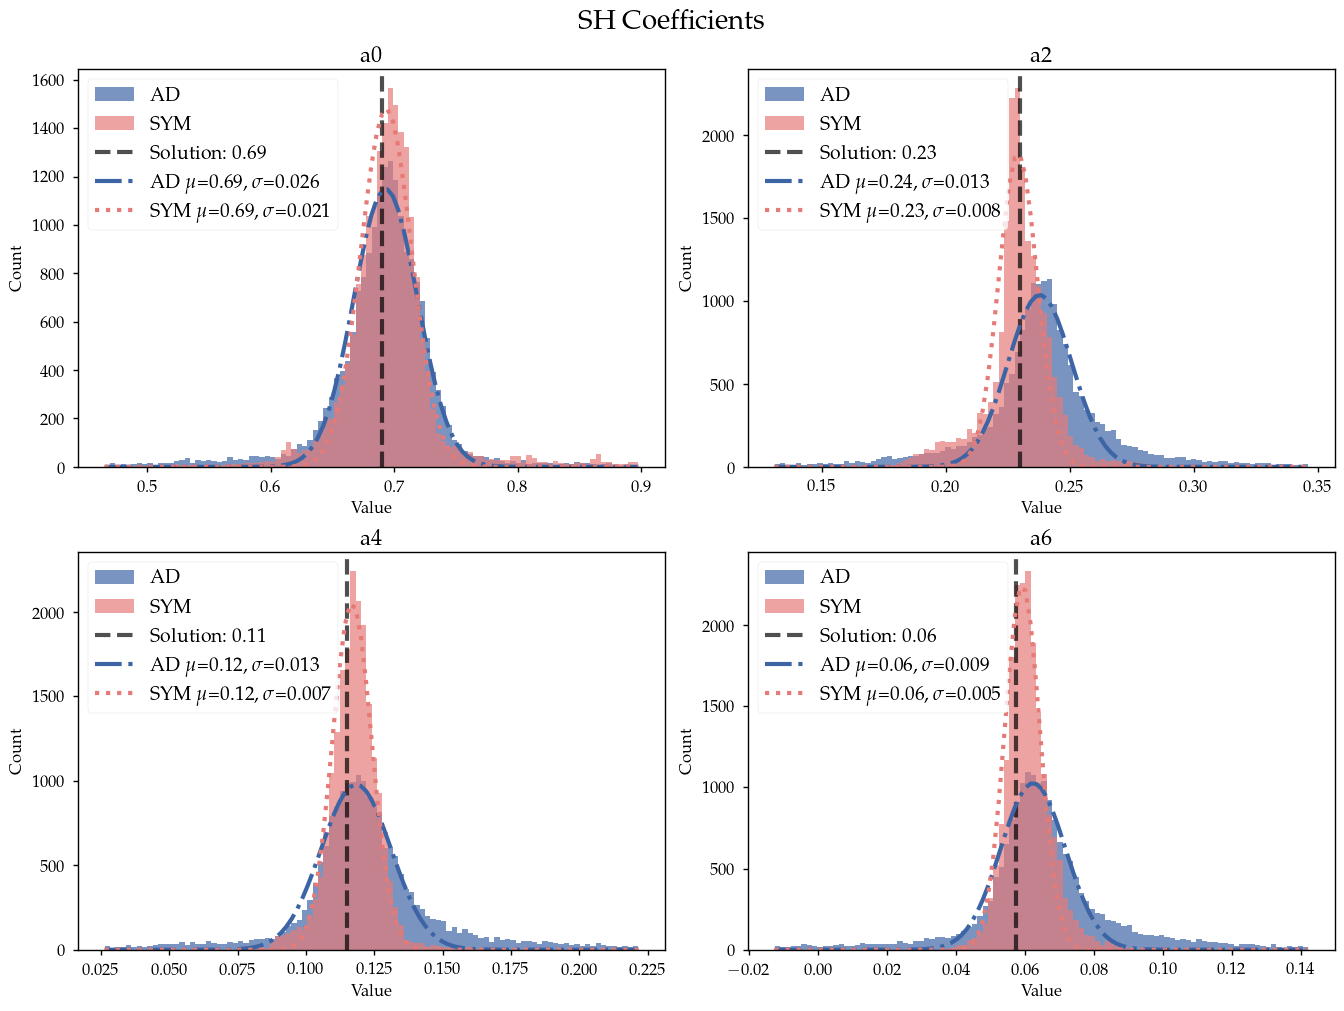

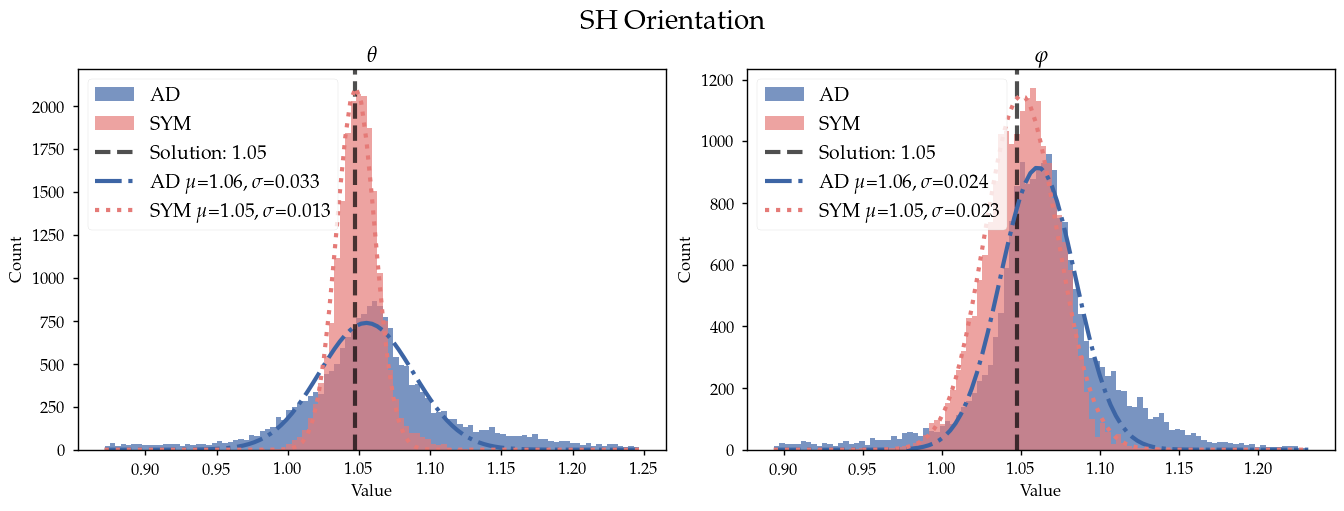

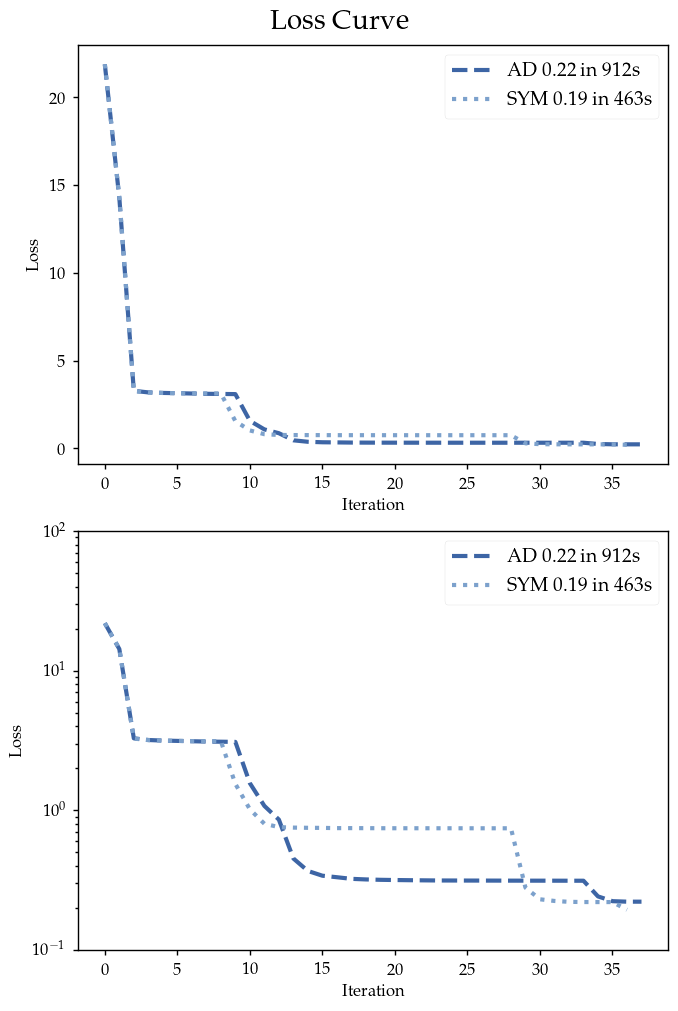

In [248]:
s1, s2 = Dummy_1f27c8o.slice
print(s1, s2)
len_test = len(AD_1f27c8o.a0[s1:s2, s1:s2, s1:s2].flatten())
print(len_test)



plot_SH_aligned_distribution(
    AD_1f27c8o,
    symbolic_1f27c8o,
    Dummy_1f27c8o.params[:,0,0,0],
    Dummy_1f27c8o.slice,
    "coeffs",
    title="SH ",
    bins=100,
    save=False,
    save_name="thesis_res/SH_coeffs_aligned_distribution",
    std_c=2.5,
    DPI = 100,
    morefigs = False,
)
plot_SH_aligned_distribution(
    AD_1f27c8o,
    symbolic_1f27c8o,
    Dummy_1f27c8o.params[-2:,0,0,0],
    Dummy_1f27c8o.slice,
    "angles",
    title="SH ",
    bins=100,
    save=False,
    save_name="thesis_res/SH_coeffs_aligned_distribution",
    std_c=2.5,
    DPI = 100,
    shareaxis = False)

loss_data = {}
loss_data["AD"] = [AD_1f27c8o.loss_curve, AD_1f27c8o.tot_time]
loss_data["SYM"] = [symbolic_1f27c8o.loss_curve, symbolic_1f27c8o.tot_time]

plot_loss_curves(loss_data, save=False, DPI=100, logcurve=True, yloglim = (1e-1,1e2))

In [307]:
Dummy_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data Sets\Dummy_periodic_filter3_17cube_18off_0align.mat"
Dummy_3f17c18o = SH_Reconstruction(Dummy_path, dataset=True)
symbolic_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter3_17cube_18off_0align_q17-40_correct_symbolic.mat"
symbolic_3f17c18o = SH_Reconstruction(symbolic_path, dataset=False)
AD_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Dummy_periodic_filter3_17cube_18off_0align_q17-40_correct_AD_python.mat"
AD_3f17c18o = SH_Reconstruction(AD_path, dataset=False)

9 26
4913


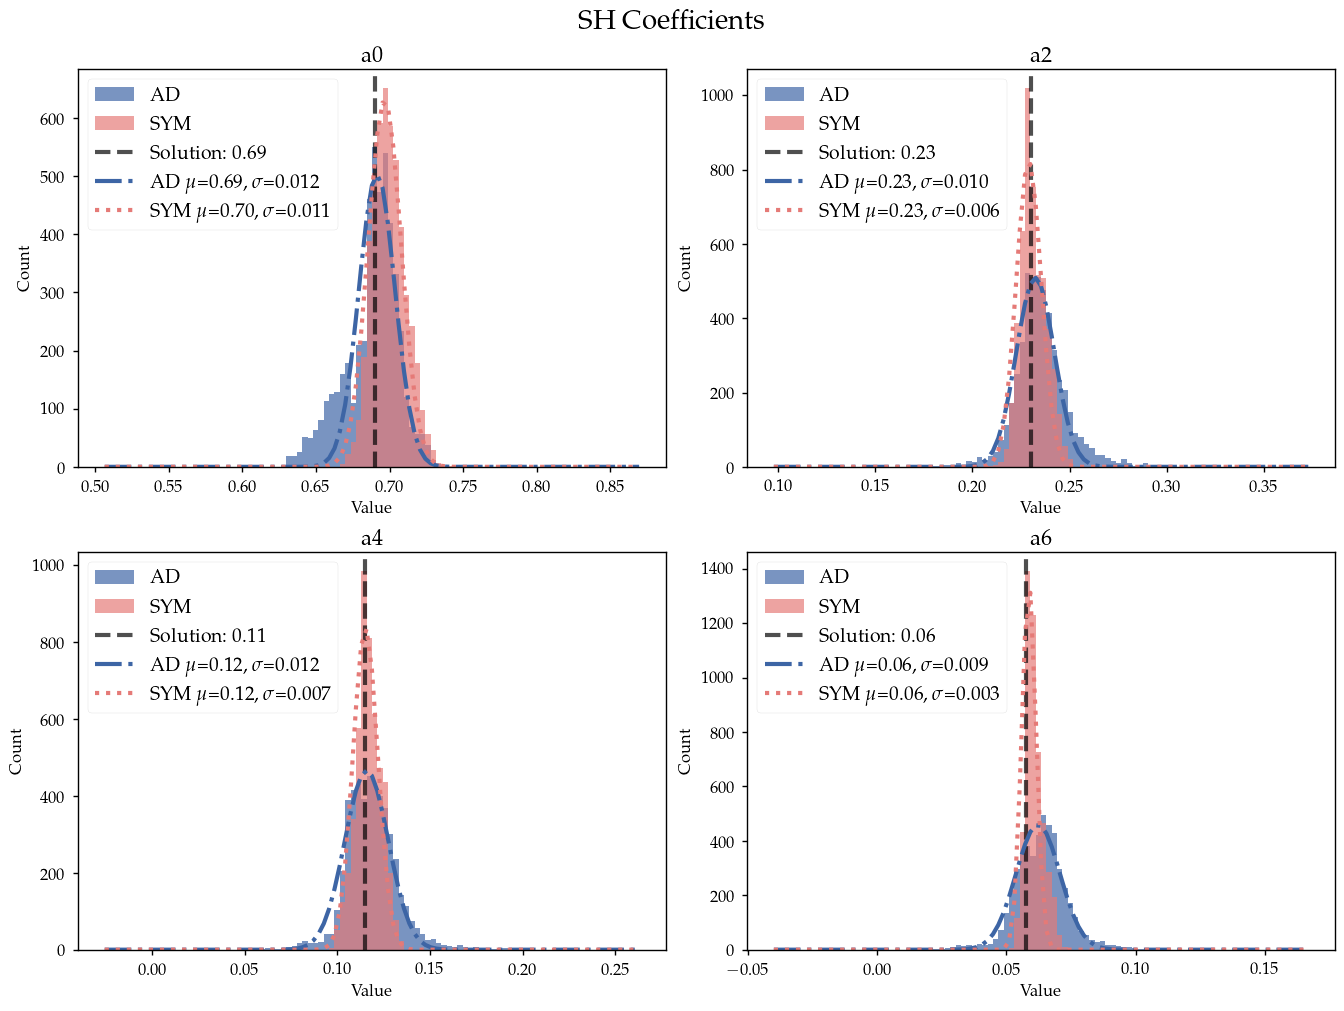

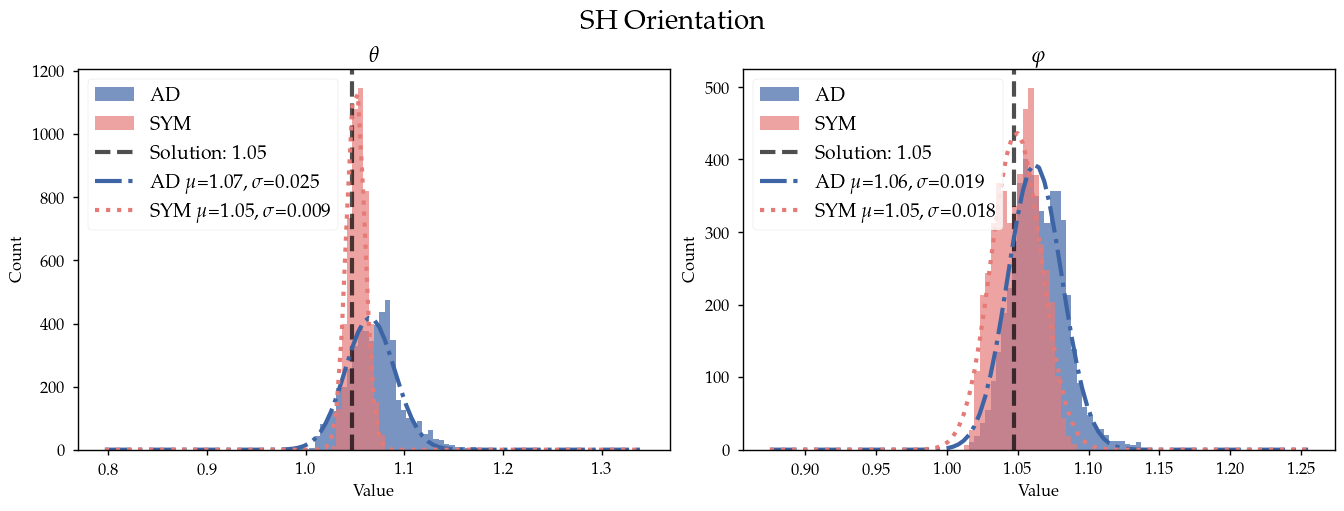

In [226]:

s1, s2 = Dummy_3f17c18o.slice
print(s1, s2)
len_test = len(AD_3f17c18o.a0[s1:s2, s1:s2, s1:s2].flatten())
print(len_test)
plot_SH_aligned_distribution(
    AD_3f17c18o,
    symbolic_3f17c18o,
    Dummy_3f17c18o.params[:,0,0,0],
    Dummy_3f17c18o.slice,
    "coeffs",
    title="SH ",
    bins=100,
    save=False,
    save_name="thesis_res/SH_coeffs_aligned_distribution",
    std_c=10,
    DPI = 100,
)
plot_SH_aligned_distribution(
    AD_3f17c18o,
    symbolic_3f17c18o,
    Dummy_3f17c18o.params[-2:,0,0,0],
    Dummy_3f17c18o.slice,
    "angles",
    title="SH ",
    bins=100,
    save=False,
    save_name="thesis_res/SH_coeffs_aligned_distribution",
    std_c=10,
    DPI = 100,
    shareaxis = False)




In [ ]:
# Consider do to limits from symbolic value instead of std values. 



In [233]:
Difficult_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Data Sets\Difficult_periodic_filter3_17cube_8off_0align.mat"
Difficult_3f17c8o = SH_Reconstruction(Difficult_path, dataset=True)
symbolic_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Difficult_periodic_filter3_17cube_8off_0align_q17-40_all_again_symbolic.mat"
symbolic_diff_3f17c8o = SH_Reconstruction(symbolic_path, dataset=False)
AD_path = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res\result_Difficult_periodic_filter3_17cube_8off_0align_q17-40_all_again_AD_python.mat"
AD_diff_3f17c8o = SH_Reconstruction(AD_path, dataset=False)

4 21
4913


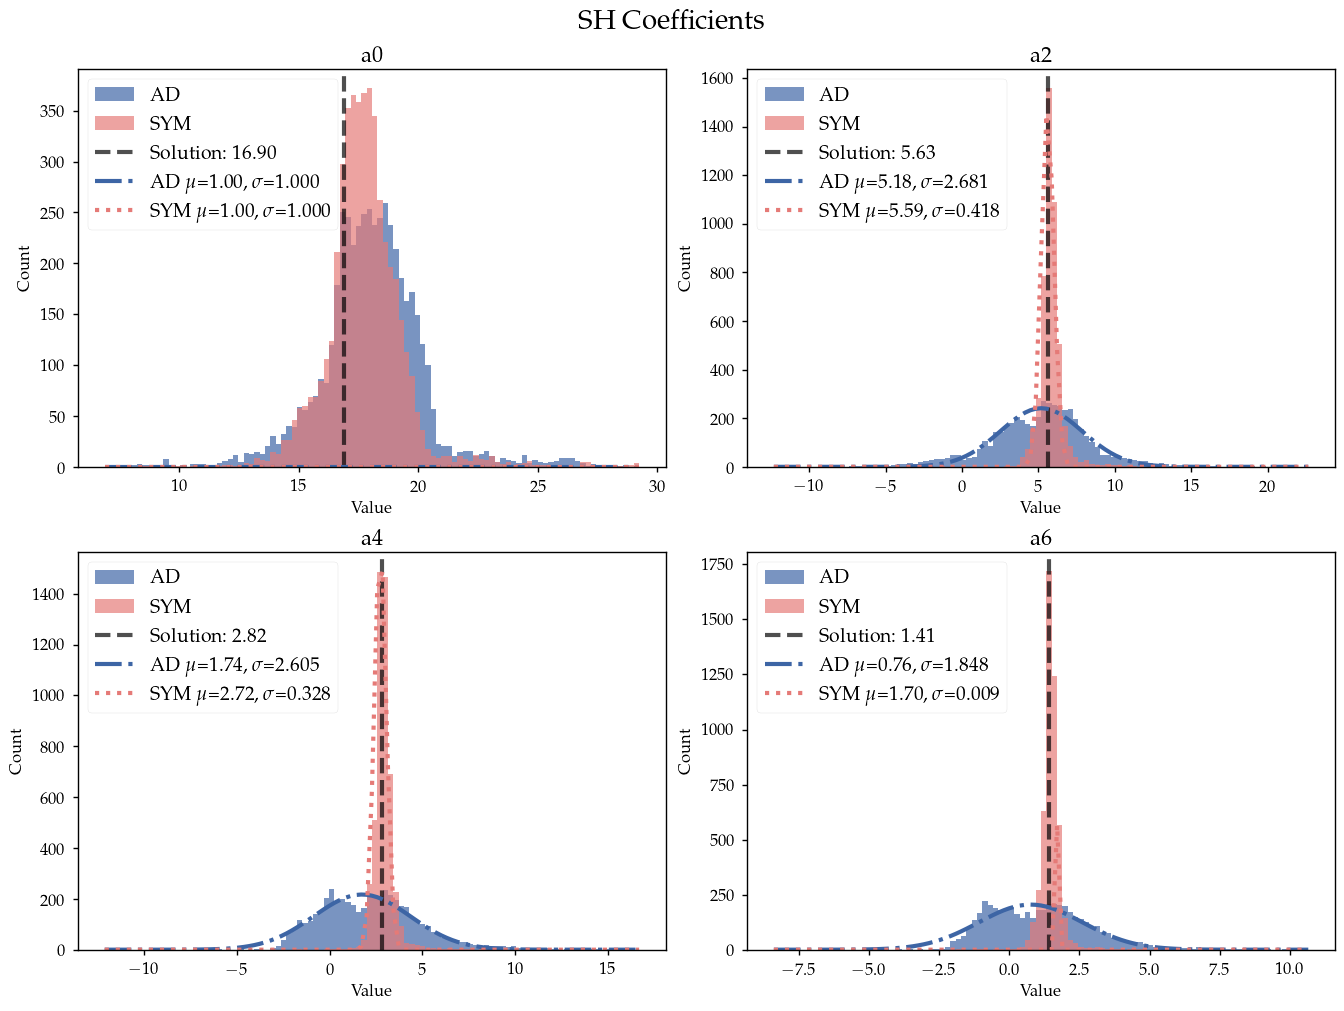

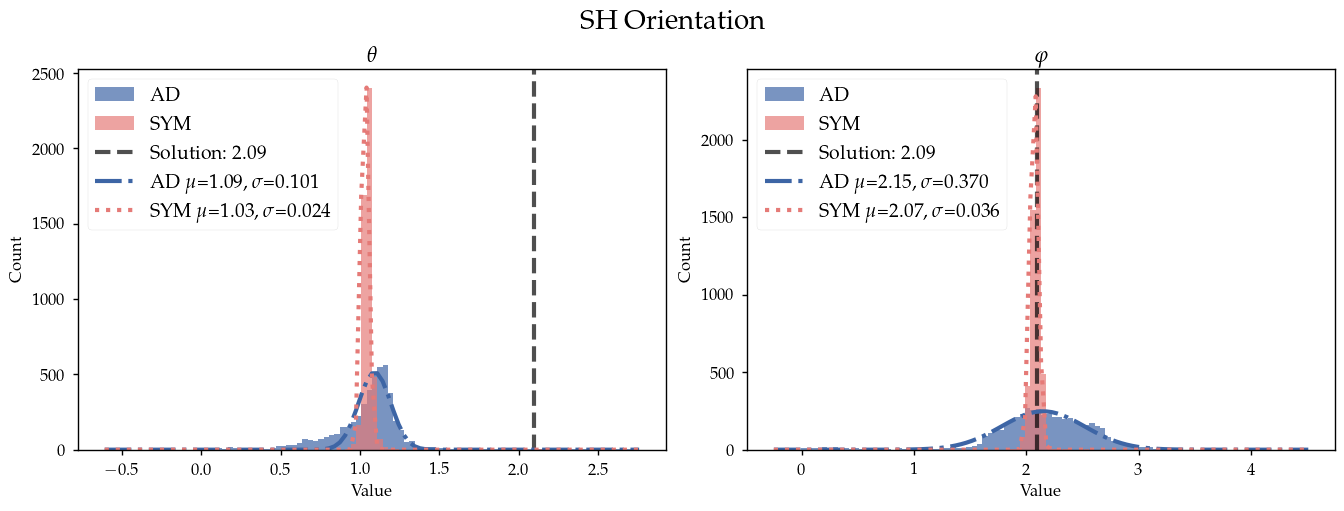

In [235]:

s1, s2 = Difficult_3f17c8o.slice
print(s1, s2)
len_test = len(AD_diff_3f17c8o.a0[s1:s2, s1:s2, s1:s2].flatten())
print(len_test)
plot_SH_aligned_distribution(
    AD_diff_3f17c8o,
    symbolic_diff_3f17c8o,
    Difficult_3f17c8o.params[:,0,0,0],
    Difficult_3f17c8o.slice,
    "coeffs",
    title="SH ",
    bins=100,
    save=False,
    save_name="thesis_res/SH_coeffs_aligned_distribution",
    std_c=5,
    DPI = 100,
)
plot_SH_aligned_distribution(
    AD_diff_3f17c8o,
    symbolic_diff_3f17c8o,
    Difficult_3f17c8o.params[-2:,0,0,0],
    Difficult_3f17c8o.slice,
    "angles",
    title="SH ",
    bins=100,
    save=False,
    save_name="thesis_res/SH_coeffs_aligned_distribution",
    std_c=5,
    DPI = 100,
    shareaxis = False)

print()

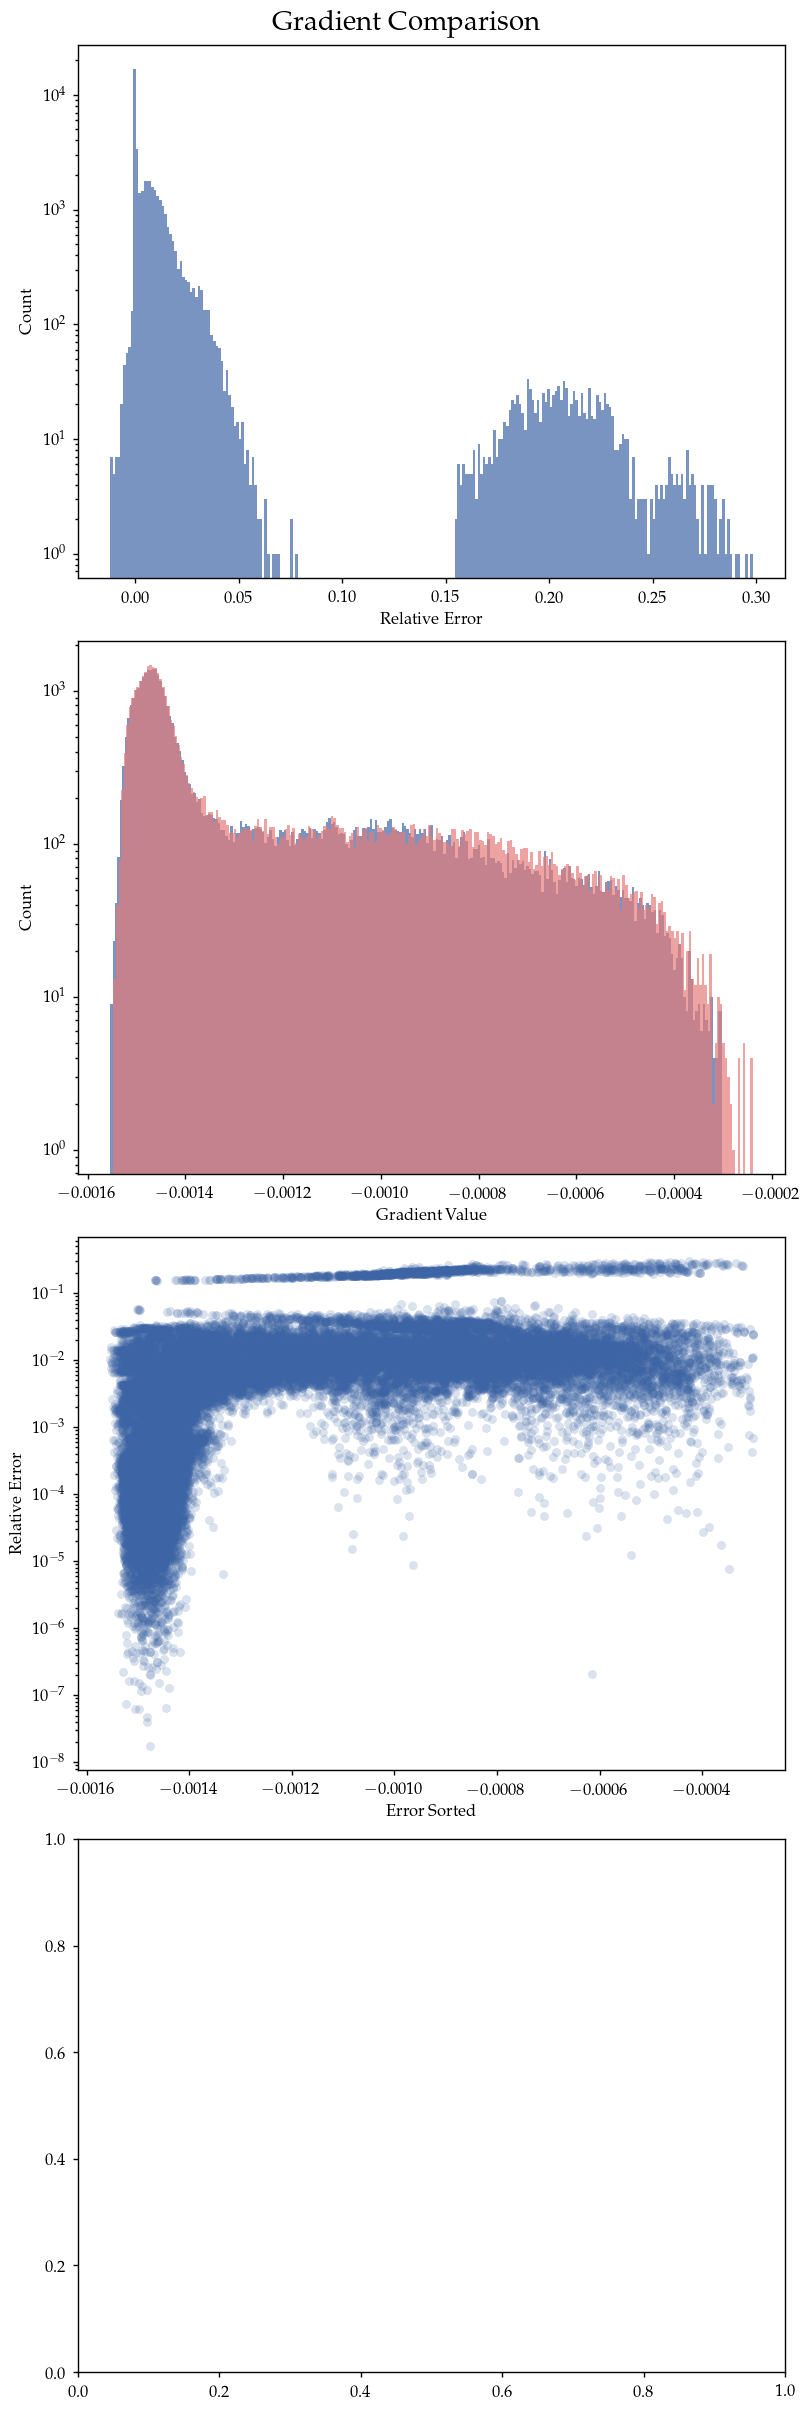

In [297]:
grad_a_AD = r"grad_a_AD_filter1_27cube_8off_0aligned.mat"
grad_a_SYM = r"grad_a_SYM_filter1_27cube_8off_0aligned"

plot_SH_diff_grads(
    grad_a_AD,
    grad_a_SYM,
    bins=250,
    save=False,
    save_name="SH_diff_grads",
    dir=r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\XRD_CT\Results\thesis_res",
)


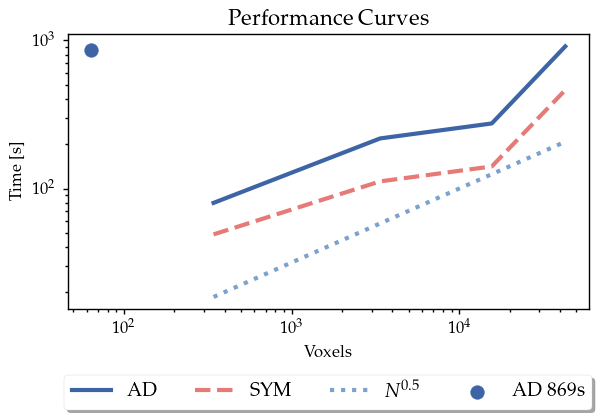

In [370]:
sym_times = [49, symbolic.tot_time, symbolic_1f17c8o.tot_time, symbolic_1f27c8o.tot_time]
AD_times = [80, AD.tot_time, AD_1f17c8o.tot_time, AD_1f27c8o.tot_time]
sizes = [7, 15, 25, 35 ]
AD_initially = [4, 869]

# This plot can become real nice. 

plot_performance_curves(sizes, AD_times, sym_times, AD_initially, save=False, save_name="thesis_res/SH_performance_curves")